In [46]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [121]:
df = pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [122]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [123]:
satisfied_not_left = len(df[(df.left == 0) & (df.satisfaction_level >= 0.612834)])
satisfied_left = len(df[(df.left == 1) & (df.satisfaction_level >= 0.612834)])
not_satisfied_not_left = len(df[(df.left == 0) & (df.satisfaction_level < 0.612834)])
not_satisfied_left = len(df[(df.left == 1) & (df.satisfaction_level < 0.612834)])

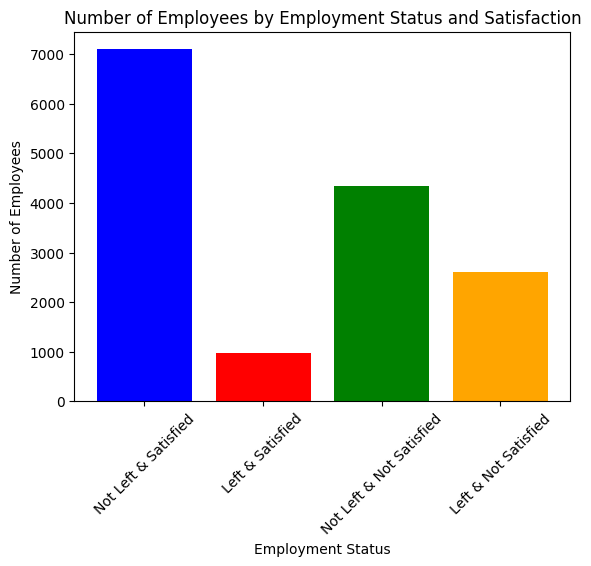

In [79]:
labels = ['Not Left & Satisfied', 'Left & Satisfied', 'Not Left & Not Satisfied', 'Left & Not Satisfied']
values = [satisfied_not_left, satisfied_left, not_satisfied_not_left, not_satisfied_left]
x = range(len(labels))
plt.bar(x, values, color=['blue', 'red', 'green', 'orange'])
plt.xlabel('Employment Status')
plt.ylabel('Number of Employees')
plt.title('Number of Employees by Employment Status and Satisfaction')
plt.xticks(x, labels, rotation=45)
plt.show()

In [97]:
percentages = [
    (satisfied_not_left / len(df.left) * 100),
    (satisfied_left / len(df.left) * 100),
    (not_satisfied_not_left / len(df.left) * 100),
    (not_satisfied_left / len(df.left) * 100)
]
print(percentages)


[47.31648776585106, 6.433762250816722, 28.875258350556702, 17.37449163277552]


It is clear from this graph that there is a relationship between the satisfied employees and the employees that didn't left, since there is a 47.32% of the employees that were satisfied and didn't leave.

<Axes: xlabel='salary'>

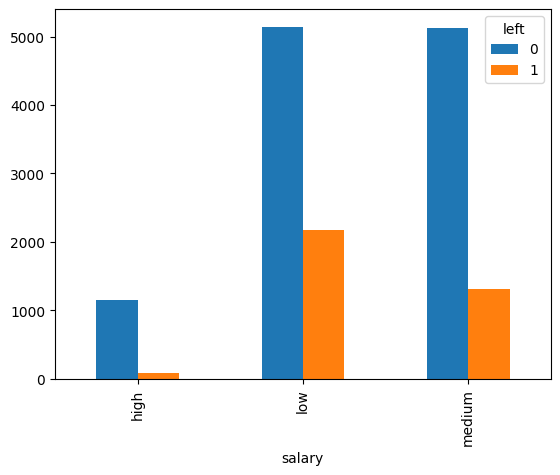

In [81]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

In [88]:
high = 0
medium = 0
low = 0

for i in df.index:
    if df.salary[i] == 'high' and df.left[i] == 1:
        high += 1
    elif df.salary[i] == 'medium' and df.left[i] == 1:
        medium += 1
    elif df.salary[i] == 'low' and df.left[i] == 1:
        low += 1

# Print the counts
print("High Salary Count:", high)
print("Medium Salary Count:", medium)
print("Low Salary Count:", low)

High Salary Count: 82
Medium Salary Count: 1317
Low Salary Count: 2172


In [94]:
percentages = [
    (high/ len(df.left[df.left == 1]) * 100),
    (medium/ len(df.left[df.left == 1]) * 100),
    (low / len(df.left[df.left == 1]) * 100),
]
percentages

[2.2962755530663683, 36.88042565107813, 60.82329879585551]

It seems clear that there are a lot of employees with low and medium salaries which left, since out of the total of employees that left, 60.82 % had a low salary and 36.88 had a medium salary. 

<Axes: xlabel='Department'>

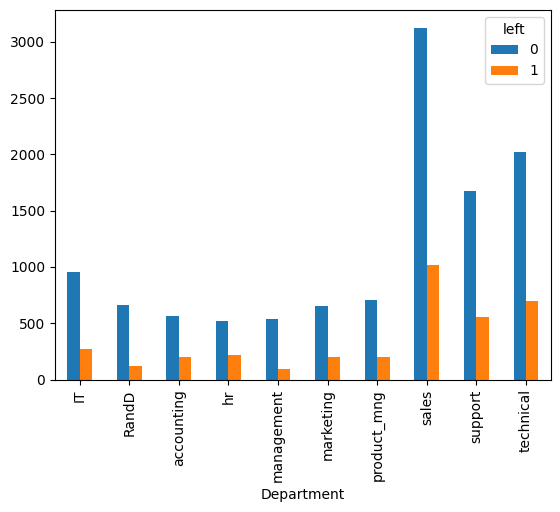

In [101]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

The chart above suggests that while the department may have some influence on employee retention, its effect does not appear to be significant. Therefore, we will exclude the department variable from our analysis.







In [110]:
correlation = df['average_montly_hours'].corr(df['left'])

print("Correlation coefficient:", correlation)

Correlation coefficient: 0.07128717878330129


A correlation coefficient of 0.071 suggests a very weak positive correlation between the number of monthly hours worked and the likelihood of leaving.

In [114]:
left_promoted = len(df[(df.left == 1) & (df.promotion_last_5years == 1)])
no_left_promoted = len(df[(df.left == 0) & (df.promotion_last_5years == 1)])
left_no_promoted = len(df[(df.left == 1) & (df.promotion_last_5years == 0)])
no_left_no_promoted = len(df[(df.left == 0) & (df.promotion_last_5years == 0)])

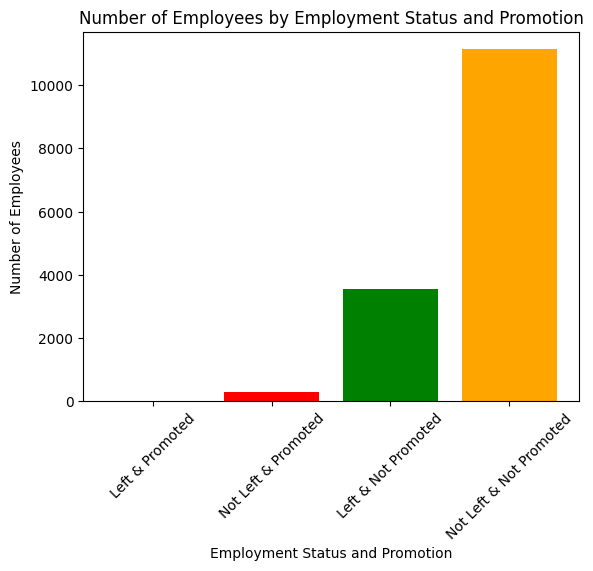

In [115]:
labels = ['Left & Promoted', 'Not Left & Promoted', 'Left & Not Promoted', 'Not Left & Not Promoted']
values = [left_promoted, no_left_promoted, left_no_promoted, no_left_no_promoted]
x = range(len(labels))
plt.bar(x, values, color=['blue', 'red', 'green', 'orange'])
plt.xlabel('Employment Status and Promotion')
plt.ylabel('Number of Employees')
plt.title('Number of Employees by Employment Status and Promotion')
plt.xticks(x, labels, rotation=45)
plt.show()

In [116]:
percentages = [
    (left_promoted / len(df.left) * 100),
    (no_left_promoted/ len(df.left) * 100),
    (left_no_promoted/ len(df.left) * 100),
    (no_left_no_promoted/ len(df.left) * 100),
]
percentages

[0.1266751116741116, 2.000133342222815, 23.681578771918126, 74.19161277418495]

There is a considerable amount of people that left and didn't get a promotion (23.68 %), so we will count this as a important variable for the logistic regression. 

In [117]:
left_accident = len(df[(df.left == 1) & (df.Work_accident == 1)])
no_left_accident = len(df[(df.left == 0) & (df.Work_accident == 1)])
left_no_accident = len(df[(df.left == 1) & (df.Work_accident == 0)])
no_left_no_accident = len(df[(df.left == 0) & (df.Work_accident == 0)])

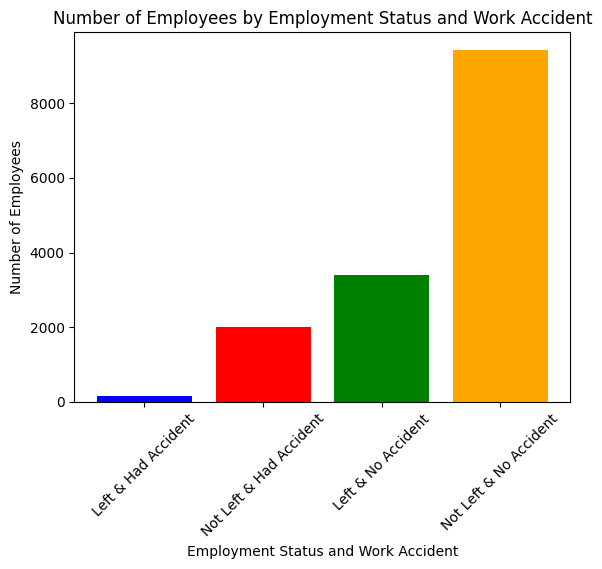

In [118]:
# Labels
labels = ['Left & Had Accident', 'Not Left & Had Accident', 'Left & No Accident', 'Not Left & No Accident']

# Values
values = [left_accident, no_left_accident, left_no_accident, no_left_no_accident]

# Plotting
x = range(len(labels))
plt.bar(x, values, color=['blue', 'red', 'green', 'orange'])
plt.xlabel('Employment Status and Work Accident')
plt.ylabel('Number of Employees')
plt.title('Number of Employees by Employment Status and Work Accident')
plt.xticks(x, labels, rotation=45)
plt.show()

From the graph we can see that there is no relationship between this variables 

From the data analysis so far we can conclude that we will use following variables as independant variables in our model
**Satisfaction Level**
**Promotion Last 5 Years**
**Salary**

In [238]:
subdf = df[['satisfaction_level','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,promotion_last_5years,salary
0,0.38,0,low
1,0.80,0,medium
2,0.11,0,medium
3,0.72,0,low
4,0.37,0,low


In [239]:
df_with_dummies = pd.get_dummies(subdf.salary, prefix="salary")
df_with_dummies = pd.concat([subdf,dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,promotion_last_5years,salary,satisfaction_level,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,0,low,0.38,0,low,0,1,0
1,0.80,0,medium,0.80,0,medium,0,0,1
2,0.11,0,medium,0.11,0,medium,0,0,1
3,0.72,0,low,0.72,0,low,0,1,0
4,0.37,0,low,0.37,0,low,0,1,0


In [240]:
for i in df_with_dummies.index: 
    if df_with_dummies.loc[i, 'salary_high']== False:
        df_with_dummies.loc[i, 'salary_high'] =  0
    else:
        df_with_dummies.loc[i, 'salary_high'] =  1
    if df_with_dummies.loc[i, 'salary_low']== False:
        df_with_dummies.loc[i, 'salary_low'] =  0
    else:
        df_with_dummies.loc[i, 'salary_low'] =  1
    if df_with_dummies.loc[i,'salary_medium'] == False:
        df_with_dummies.loc[i,'salary_medium']=0
    else:
        df_with_dummies.loc[i,'salary_medium']=1 
df_with_dummies

,satisfaction_level,promotion_last_5years,salary,satisfaction_level,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,0,low,0.38,0,low,0,1,0
1,0.80,0,medium,0.80,0,medium,0,0,1
2,0.11,0,medium,0.11,0,medium,0,0,1
3,0.72,0,low,0.72,0,low,0,1,0
4,0.37,0,low,0.37,0,low,0,1,0
...,...,...,...,...,...,...,...,...,...
14994,0.40,0,low,0.40,0,low,0,1,0
14995,0.37,0,low,0.37,0,low,0,1,0
14996,0.37,0,low,0.37,0,low,0,1,0
14997,0.11,0,low,0.11,0,low,0,1,0


In [241]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.drop('salary_medium',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,promotion_last_5years,satisfaction_level,promotion_last_5years,salary_high,salary_low
0,0.38,0,0.38,0,0,1
1,0.80,0,0.80,0,0,0
2,0.11,0,0.11,0,0,0
3,0.72,0,0.72,0,0,1
4,0.37,0,0.37,0,0,1


In [242]:
X = df_with_dummies
X.head()

,satisfaction_level,promotion_last_5years,satisfaction_level,promotion_last_5years,salary_high,salary_low
0,0.38,0,0.38,0,0,1
1,0.80,0,0.80,0,0,0
2,0.11,0,0.11,0,0,0
3,0.72,0,0.72,0,0,1
4,0.37,0,0.37,0,0,1


In [243]:
y= df.left

In [254]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.1)

In [255]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [256]:
model.fit(X_train, y_train)

LogisticRegression()

In [257]:
model.predict(X_test)

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

Model acurracy 

In [258]:
model.score(X_test,y_test)

0.7818518518518518